In [213]:

#pandas
import pandas as pd
from pandas import Series,DataFrame

#numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.linear_model import Lasso
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,accuracy_score,mean_squared_log_error
from sklearn.metrics import roc_curve, auc,roc_auc_score,mean_squared_error
import xgboost as xgb
from numpy.linalg import inv
from xgboost.sklearn import XGBClassifier
from sklearn.kernel_ridge import KernelRidge
import matplotlib.dates
import pylab as p
#import matplotlib.axes3d as p3
import mpl_toolkits.mplot3d.axes3d as p3

In [214]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [215]:
train_data.shape

(2400, 14)

In [216]:
test_data.shape

(600, 12)

In [217]:
filename = "train/1/geometry.xyz"
size =0 
xyz_test = open(filename, "r")
for line in xyz_test:
    print( '>>> ', line)
    print(size)
    size+=1
xyz_test.close()

>>>  #=======================================================

0
>>>  #Created using the Atomic Simulation Environment (ASE)

1
>>>  #=======================================================

2
>>>  lattice_vector 9.9520877199999997 -0.0472482400000000 -0.0346579300000000 

3
>>>  lattice_vector 0.0403159900000000 8.5511748500000007 -0.0095337700000000 

4
>>>  lattice_vector 0.0316403800000000 0.0096659200000000 9.1774391200000007 

5
>>>  atom 1.6088879366700000 7.2764162181499996 6.3831551912900002 Ga

6
>>>  atom 6.5849317966699994 7.2527920981499996 6.3658262262900003 Al

7
>>>  atom 3.4357584130499994 1.2597758443300000 1.7946126469900001 Al

8
>>>  atom 8.4118022730499984 1.2361517243300000 1.7772836819900002 Ga

9
>>>  atom 0.9558803130300000 2.9989252240300002 1.8013513079500003 Ga

10
>>>  atom 5.9319241730299996 2.9753011040300001 1.7840223429500002 Al

11
>>>  atom 4.0887660366900000 5.5372668384500008 6.3764165303300002 Al

12
>>>  atom 9.0648098966900008 5.5136427184500008

In [218]:
train_data.describe()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1200.500000,141.517917,61.679167,0.385439,0.308601,0.305958,10.030005,7.086977,12.593288,90.243666,92.398971,94.787600,0.187614,2.077205
std,692.964646,84.715548,22.598337,0.265566,0.233717,0.263198,5.645457,1.890330,5.450746,1.333655,5.299734,25.868516,0.104100,1.006845
min,1.000000,12.000000,10.000000,0.000000,0.000000,0.000000,3.037000,2.942300,5.672500,82.744100,81.641300,29.727400,0.000000,0.000100
25%,600.750000,33.000000,40.000000,0.166700,0.093800,0.062500,6.141100,5.833625,9.298000,89.999700,90.000900,89.998700,0.105600,1.278500
50%,1200.500000,194.000000,80.000000,0.375000,0.281200,0.250000,9.537450,6.382950,10.125000,90.001700,90.003550,90.000400,0.181800,1.907850
75%,1800.250000,206.000000,80.000000,0.583300,0.468800,0.468800,10.292100,9.093450,14.372050,90.006200,90.014400,119.998325,0.256275,2.761950
max,2400.000000,227.000000,80.000000,1.000000,1.000000,1.000000,24.913400,10.290300,25.346000,101.229800,106.168200,120.053500,0.657200,5.286100


In [219]:
train_data.columns

Index(['id', 'spacegroup', 'number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'formation_energy_ev_natom',
       'bandgap_energy_ev'],
      dtype='object')

In [220]:
lattice_columns = ['lattice_vector_1_ang','lattice_vector_2_ang', 'lattice_vector_3_ang','lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree']

In [221]:
def get_xyz_data(filename):
    pos_data = []
    lat_data = []
    with open(filename) as f:
        for line in f.readlines():
            x = line.split()
            if x[0] == 'atom':
                pos_data.append([np.array(x[1:4], dtype=np.float),x[4]])
            elif x[0] == 'lattice_vector':
                lat_data.append(np.array(x[1:4], dtype=np.float))
    return pos_data, np.array(lat_data)

In [222]:
train_data.tail()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
2395,2396,33,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015,0.0381,3.7349
2396,2397,167,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007,0.0670,3.4915
2397,2398,206,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954,0.0906,3.2750
2398,2399,33,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004,0.2566,1.3915
2399,2400,206,80.0,0.8750,0.0938,0.0312,9.0648,9.0641,9.0643,90.0027,90.0037,89.9987,0.1135,4.2107


In [223]:
crystal_positions_dict = {}
crystal_lattice_dict = {}
for id_ in range(1,2401):
    row_id = id_ 
    fn = "train/{}/geometry.xyz".format(row_id)
    crystal_xyz, crystal_lat = get_xyz_data(fn)
    crystal_positions_dict[row_id] = crystal_xyz
    crystal_lattice_dict[row_id] = crystal_lat

In [224]:
crystal_positions_dict_test = {}
crystal_lattice_dict_test = {}
for id_ in range(1,601):
    row_id = id_ 
    fn = "test/{}/geometry.xyz".format(row_id)
    crystal_xyz, crystal_lat = get_xyz_data(fn)
    crystal_positions_dict_test[row_id] = crystal_xyz
    crystal_lattice_dict_test[row_id] = crystal_lat

In [225]:
def reduce_vector(vector_positions,lattice_vector,composition):
    Inverse_A = inv(lattice_vector.T)
    reduced_vector_positions = pd.DataFrame(columns=['x','y','z','element','composition'])
    s1 = [] 
    s2 = []
    s3 = []
    s4 = []
    for vector in vector_positions:
        r_vector = np.matmul(Inverse_A,vector[0].reshape(3,1))
        s1.append(r_vector[0][0])
        s2.append(r_vector[1][0])
        s3.append(r_vector[2][0])
        s4.append(vector[1])
    reduced_vector_positions['x'] = s1
    reduced_vector_positions['y'] = s2
    reduced_vector_positions['z'] = s3
    reduced_vector_positions['element'] = s4
    reduced_vector_positions['composition'] = composition
    return reduced_vector_positions
    
    

In [226]:
df1 = reduce_vector(crystal_positions_dict[1],crystal_lattice_dict[1],1)
df2 =  reduce_vector(crystal_positions_dict[2],crystal_lattice_dict[2],2)
print(df1.shape)
print(df2.shape)
newdf = (pd.concat([df1,df2]))
print (newdf.shape)
newdf.tail()

(80, 5)
(80, 5)
(160, 5)


,x,y,z,element,composition
75,1.0,5.000000e-01,0.875,O,2
76,0.5,5.204170e-18,0.375,O,2
77,0.5,1.040834e-17,0.875,O,2
78,0.5,5.000000e-01,0.375,O,2
79,0.5,5.000000e-01,0.875,O,2


In [227]:
train_final_df = pd.DataFrame()
for i in range(1,2401):
    df = reduce_vector(crystal_positions_dict[i],crystal_lattice_dict[i],i)
    train_final_df = pd.concat([train_final_df,df])
print(train_final_df.shape)
    

(148030, 5)


In [228]:
test_final_df = pd.DataFrame()
for i in range(1,601):
    df = reduce_vector(crystal_positions_dict[i],crystal_lattice_dict[i],i)
    test_final_df = pd.concat([test_final_df,df])
print(test_final_df.shape)
    

(37590, 5)


In [229]:
sr = pd.Series(train_final_df['element'])
t= pd.get_dummies(sr)
t.head()

,Al,Ga,In,O
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0


In [230]:
def label_element(df):
    sr = pd.Series(df['element'])
    t= pd.get_dummies(sr)
    df['Al'] = t['Al']
    df['Ga'] = t['Ga']
    df['In'] = t['In']
    df['O'] = t['O']
    return df

In [231]:
test_final_df = label_element(test_final_df)

In [232]:
train_final_df =  label_element(train_final_df)
train_final_df.columns

Index(['x', 'y', 'z', 'element', 'composition', 'Al', 'Ga', 'In', 'O'], dtype='object')

In [233]:
test_df = pd.DataFrame()
test_df['col1'] = [True,True,True,False,False]
np.sum(test_df['col1'])

3

In [234]:
train_final_df.tail()

,x,y,z,element,composition,Al,Ga,In,O
75,0.656,0.880,0.891,O,2400,0,0,0,1
76,0.109,0.844,0.880,O,2400,0,0,0,1
77,0.609,0.656,0.120,O,2400,0,0,0,1
78,0.891,0.344,0.620,O,2400,0,0,0,1
79,0.891,0.656,0.880,O,2400,0,0,0,1


In [235]:
def find_error(error_df):
    total_error = 0
    #print("here:")
    for composition in range(1,1601):
        clusters_comp = error_df[error_df['composition'] == composition]
        maximum_occur = clusters_comp['clusters_for_data'].value_counts().idxmax()
        #print(maximum_occur)
        #error_temp = np.sum(clusters_comp[clusters_comp['clusters_for_data'] != maximum_occur].values)
        #print(error_temp)
        total_error += np.sum(clusters_comp[clusters_comp['clusters_for_data'] != maximum_occur].values)
    return total_error

In [236]:
def find_optimum(features,df1):
    errors = []
    for i in range(25,75):
        print(i)
        kmeans1 = KMeans(n_clusters=i,random_state=i).fit(df1[features])
        clusters_for_data = kmeans1.predict(df1[features])
        error_df = df1[['composition']]
        error_df['clusters_for_data'] = clusters_for_data
        #print(error_df)
        error = find_error(error_df)
        errors.append(error)
    plt.plot(errors)
    

    



25


C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


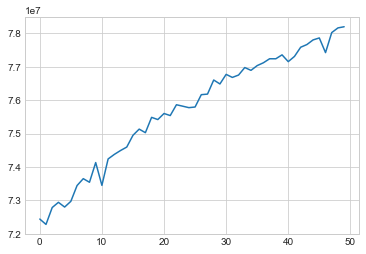

In [158]:
features = ['x', 'y', 'z', 'Al', 'Ga', 'In', 'O']
find_optimum(features,train_final_df)

In [237]:
train_final_df

,x,y,z,element,composition,Al,Ga,In,O
0,0.1560,0.851,6.970000e-01,Ga,1,0,1,0,0
1,0.6560,0.851,6.970000e-01,Al,1,1,0,0,0
2,0.3440,0.149,1.970000e-01,Al,1,1,0,0,0
3,0.8440,0.149,1.970000e-01,Ga,1,0,1,0,0
4,0.0940,0.351,1.970000e-01,Ga,1,0,1,0,0
5,0.5940,0.351,1.970000e-01,Al,1,1,0,0,0
6,0.4060,0.649,6.970000e-01,Al,1,1,0,0,0
7,0.9060,0.649,6.970000e-01,Al,1,1,0,0,0
8,0.0895,0.658,0.000000e+00,Al,1,1,0,0,0
9,0.5895,0.658,-4.336809e-19,Ga,1,0,1,0,0


In [238]:
features = ['x', 'y', 'z', 'Al', 'Ga', 'In', 'O','composition']
kmeans=KMeans(n_clusters=10,random_state=0).fit(train_final_df[features])
clusters_for_data = kmeans.predict(train_final_df[features])
train_final_df['clusters'] = clusters_for_data

In [239]:
clusters_for_test_data = kmeans.predict(test_final_df[features])
test_final_df['clusters'] = clusters_for_test_data

In [247]:
train_composition = train_final_df[['composition','clusters']]
train_composition_grouped = train_composition.groupby('composition')

In [248]:
test_composition = test_final_df[['composition','clusters']]
test_composition_grouped = test_composition.groupby('composition')

In [242]:
#for i in range(1,2401):
 #   train_composition_part = train_composition[train_composition['composition'] == i]
 #   train_composition[train_composition['composition']==i]['final_cluster']=train_composition_part['clusters'].value_counts().idxmax()

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [249]:
train_composition['final_cluster'] = train_composition['clusters']

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [250]:
test_composition['final_cluster'] = test_composition['clusters']

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [251]:
train_composition = train_composition[['composition','final_cluster']]

In [252]:
test_composition = train_composition[['composition','final_cluster']]
test_composition.drop_duplicates(inplace=True)

In [253]:
train_composition.drop_duplicates(inplace=True)

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


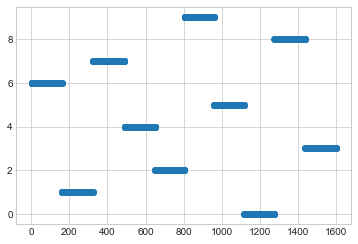

In [203]:
plt.scatter(train_composition['composition'],train_composition['final_cluster'])

In [254]:
train_composition.to_csv("train_composition_final_cluster.csv",index=False)
test_composition.to_csv("test_composition_final_cluster.csv",index=False)

In [205]:
plt.figure().sub_plot

AttributeError: 'Figure' object has no attribute 'sub_plot'

In [ ]:
fig=p.figure()
ax = p3.Axes3D(fig)
ax.scatter3D(train_final_df['x'], train_final_df['y'], train_final_df['z'],s=train_final_df['composition'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
p.show()

In [ ]:
fig = plt.figure()
fig.add_subplot?
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_final_df['x'], train_final_df['y'], train_final_df['z'], c=train_final_df['composition'], cmap='viridis', linewidth=0.5);

In [ ]:
def calculate_distace(vector1,vector2):
    x2 = (np.power((vector1[0][0] - vector2[0][0]),2))
    y2 = (np.power((vector1[0][1]- vector2[0][1]),2))
    z2 = (np.power((vector1[0][2]- vector2[0][2]),2))
    return(np.sqrt(x2+y2+z2))

In [ ]:
def reduce_vector_and_get_distance(vector_positions_with_element,lattice_vector):
    average_Al = np.zeros((1,3))
    average_Ga = np.zeros((1,3))
    average_In = np.zeros((1,3))
    average_O  = np.zeros((1,3))
    (count_Al,count_In,count_Ga,count_O) = (0,0,0,0)
    Inverse_A = inv(lattice_vector.T)
    for vector in vector_positions_with_element:
        if(vector[1] == 'Al'):
            vector_value = np.matmul(Inverse_A,vector[0].reshape(3,1))
            vector_value = vector[0].reshape(1,3)
            average_Al = np.add(average_Al,vector_value)
            count_Al+=1
        elif(vector[1] == 'Ga'):
            vector_value = np.matmul(Inverse_A,vector[0].reshape(3,1))
            vector_value = vector[0].reshape(1,3)
            average_Ga = np.add(average_Al,vector_value)
            count_Ga+=1
        elif(vector[1] == 'In'):
            vector_value = np.matmul(Inverse_A,vector[0].reshape(3,1))
            vector_value = vector[0].reshape(1,3)
            average_In = np.add(average_Al,vector_value)
            count_In+=1
        elif(vector[1] == 'O'):
            vector_value = np.matmul(Inverse_A,vector[0].reshape(3,1))
            vector_value = vector[0].reshape(1,3)
            average_O = np.add(average_Al,vector_value)
            count_O+=1
    if(count_Al):
        average_Al = average_Al/count_Al
    if(count_Ga):
        average_Ga = average_Ga/count_Ga
    if(count_In):
        average_In = average_In/count_In
    if(count_O):
        average_O  = average_O/count_O
    
    average_first_Al_Ga_In= np.add(np.add(average_Al,average_Ga),average_In)/3
    Al_Ga = int(calculate_distace(average_Al,average_Ga))
    Al_In = int(calculate_distace(average_Al,average_In))
    Ga_In = int(calculate_distace(average_Ga,average_In))
    
    AlGaIn_O = int(calculate_distace(average_first_Al_Ga_In,average_O))
    return [Al_Ga,Al_In,Ga_In,AlGaIn_O]
            
            

In [ ]:
reduce_vector_and_get_distance(crystal_positions_dict[1],crystal_lattice_dict[1])

In [ ]:
transform_train = train_data
a_dist = transform_train['id'].map(lambda row: reduce_vector_and_get_distance(crystal_positions_dict[row],crystal_lattice_dict[row]))

In [ ]:
transform_train['Al_Ga'] = transform_train['id'].map(lambda id_: a_dist[id_-1][0])
transform_train['Al_In'] = transform_train['id'].map(lambda id_: a_dist[id_-1][1])
transform_train['Ga_In'] = transform_train['id'].map(lambda id_: a_dist[id_-1][2])
transform_train['AlGaIn_O'] = transform_train['id'].map(lambda id_: a_dist[id_-1][3])


In [ ]:
transform_test = test_data
a_dist = transform_test['id'].map(lambda row: reduce_vector_and_get_distance(crystal_positions_dict_test[row],crystal_lattice_dict_test[row]))

In [ ]:
transform_test['Al_Ga'] = transform_test['id'].map(lambda id_: a_dist[id_-1][0])
transform_test['Al_In'] = transform_test['id'].map(lambda id_: a_dist[id_-1][1])
transform_test['Ga_In'] = transform_test['id'].map(lambda id_: a_dist[id_-1][2])
transform_test['AlGaIn_O'] = transform_test['id'].map(lambda id_: a_dist[id_-1][3])


In [ ]:
transform_train['n_atom_al'] = transform_train.apply(lambda row: int(row['number_of_total_atoms']*row['percent_atom_al']),axis=1)
transform_train['n_atom_ga'] = transform_train.apply(lambda row: int(row['number_of_total_atoms']*row['percent_atom_ga']),axis=1)
transform_train['n_atom_in'] = transform_train.apply(lambda row: int(row['number_of_total_atoms']*row['percent_atom_in']),axis=1)
#transform_train['n_atom_al'] = transform_train.apply(lambda row: int(row['number_of_total_atoms']*row['percent_atom_al']),axis=1)

In [ ]:
transform_train['lattice_vector_1_ang'] = transform_train.apply(lambda row: int(row['lattice_vector_1_ang']),axis=1)
transform_train['lattice_vector_2_ang'] = transform_train.apply(lambda row: int(row['lattice_vector_2_ang']),axis=1)
transform_train['lattice_vector_3_ang'] = transform_train.apply(lambda row: int(row['lattice_vector_3_ang']),axis=1)
transform_train['lattice_angle_alpha_degree'] = transform_train.apply(lambda row: int(row['lattice_angle_alpha_degree']),axis=1)
transform_train['lattice_angle_beta_degree'] = transform_train.apply(lambda row: int(row['lattice_angle_beta_degree']),axis=1)
transform_train['lattice_angle_gamma_degree'] = transform_train.apply(lambda row: int(row['lattice_angle_gamma_degree']),axis=1)

In [ ]:
transform_test['lattice_vector_1_ang'] = transform_test.apply(lambda row: int(row['lattice_vector_1_ang']),axis=1)
transform_test['lattice_vector_2_ang'] = transform_test.apply(lambda row: int(row['lattice_vector_2_ang']),axis=1)
transform_test['lattice_vector_3_ang'] = transform_test.apply(lambda row: int(row['lattice_vector_3_ang']),axis=1)
transform_test['lattice_angle_alpha_degree'] = transform_test.apply(lambda row: int(row['lattice_angle_alpha_degree']),axis=1)
transform_test['lattice_angle_beta_degree'] = transform_test.apply(lambda row: int(row['lattice_angle_beta_degree']),axis=1)
transform_test['lattice_angle_gamma_degree'] = transform_test.apply(lambda row: int(row['lattice_angle_gamma_degree']),axis=1)

In [ ]:
lb = LabelEncoder()
transform_train['spacegroup'] = 

In [ ]:
transform_test['n_atom_al'] = transform_test.apply(lambda row: int(row['number_of_total_atoms']*row['percent_atom_al']),axis=1)
transform_test['n_atom_ga'] = transform_test.apply(lambda row: int(row['number_of_total_atoms']*row['percent_atom_ga']),axis=1)
transform_test['n_atom_in'] = transform_test.apply(lambda row: int(row['number_of_total_atoms']*row['percent_atom_in']),axis=1)


In [ ]:
transform_test.head()

In [ ]:
transform_train.to_csv("transform_train.csv",index=False)
transform_test.to_csv("transform_test.csv",index=False)

In [ ]:
transform_train['formation_energy_ev_natom'] = np.log1p(transform_train['formation_energy_ev_natom'].values)
transform_train['bandgap_energy_ev'] = np.log1p(transform_train['bandgap_energy_ev'].values)

In [ ]:
dsf

In [ ]:
features = ['spacegroup','number_of_total_atoms','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree','Al_Ga','Al_In','AlGaIn_O','Ga_In','n_atom_al','n_atom_ga','n_atom_in']

In [ ]:
target = 'bandgap_energy_ev'
features1 =['spacegroup','lattice_vector_3_ang','Al_Ga','Al_In','AlGaIn_O','Ga_In','n_atom_al','n_atom_ga','n_atom_in']

In [ ]:
def RidgeModel(kernel,alpha,train,features,target,test):
    clf = KernelRidge(kernel=kernel,alpha=alpha)
    train1 =  train[features]
    train_X = train1.as_matrix()
    clf.fit(train_X,train[target].values)
    pred1 =  clf.predict(train_X)
    rsme_valid1 = np.sqrt(mean_squared_error(train[target].values,pred1))
    print(rsme_valid1)
    y_prediction = clf.predict(test[features].as_matrix())
    y_pred1 = np.exp(y_prediction)-1
    return y_pred1
    

In [ ]:
bandgap_pred = RidgeModel(kernel="polynomial",alpha=1.0,train=transform_train,features=features,target=target,test=transform_test)

In [ ]:
def modelfit(alg, dtrain, predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values,(dtrain[target].values))
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % mean_squared_error(dtrain[target].values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))

    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')
    return alg

In [ ]:
xgb1 = XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=8,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27) 
xgbFit = modelfit(xgb1,transform_train,features1,target,useTrainCV=False)

In [ ]:
target2 = 'formation_energy_ev_natom'
xgb2 = XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=8,min_child_weight=1,gamma=0,subsample=1,colsample_bytree=1,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27) 
xgbFit2 = modelfit(xgb2,transform_train,features,target2,useTrainCV=True)

In [ ]:
xgbFit2.get_params

In [ ]:
xgbFit.get_params

In [ ]:
#min child weight -> min sum of instances weight (In LR -> number of instances)
param_test1 = {
    'max_depth': [8,10,12],
    'min_child_weight': [2,3,4]
}
gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_estimators=56,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='neg_mean_squared_log_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(transform_train[features],transform_train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
test1 = crystal_positions_dict[1][1][0].reshape(1,3)
np.add(test1,average1)

In [ ]:
GridSearchCV?

In [ ]:
sample_sub = pd.read_csv("sample_submission.csv")

In [ ]:
sample_sub.head()

In [ ]:
formation_energy_ev_natom =  xgbFit2.predict(transform_test[features])

In [ ]:
hamse_na_ho_payega1 = transform_test[['id']]

In [ ]:
hamse_na_ho_payega1['formation_energy_ev_natom']  = formation_energy_ev_natom

In [ ]:
bandgap_energy_ev = xgbFit.predict(transform_test[features])

In [ ]:
formation_energy_ev_natom.shape

In [ ]:
bandgap_pred.reshape(600,1)

In [ ]:
hamse_na_ho_payega1['bandgap_energy_ev'] =  bandgap_pred

In [ ]:
hamse_na_ho_payega1.head()

In [ ]:
hamse_na_ho_payega1.to_csv("hamse_na_ho_payega.csv",index=False)

In [ ]:
hamse_na_ho_payega1[hamse_na_ho_payega1['bandgap_energy_ev'] < 0]

In [ ]:
hamse_na_ho_payega1['bandgap_energy_ev'] = hamse_na_ho_payega1.apply(lambda row: (row['bandgap_energy_ev'] = 0) if(row['bandgap_energy_ev'] <0) ,axis=1 )